No. de carros: 3
Ocupacion: 16.7%


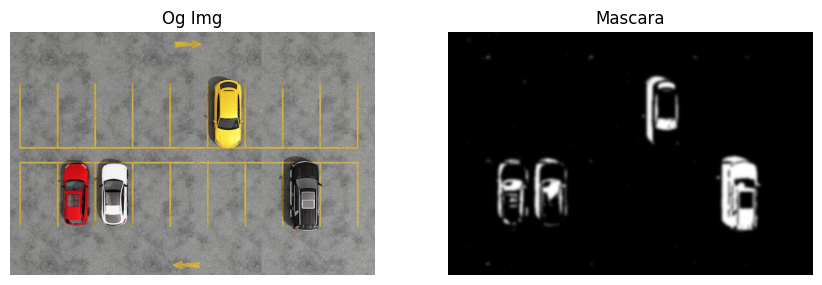

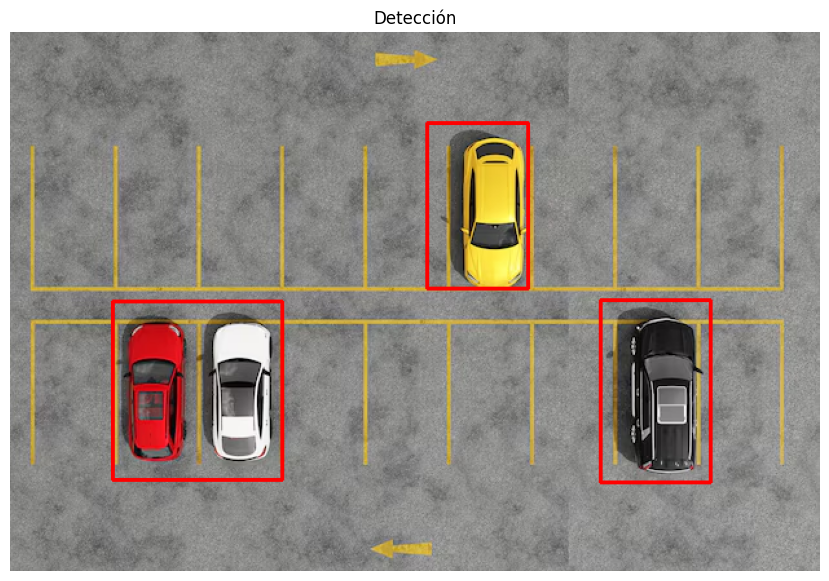

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Imagen y transformacion
estacionamiento = cv2.imread("estacionamiento.jpg") #Nombre de la imagen en uso
RgbImg = cv2.cvtColor(estacionamiento, cv2.COLOR_BGR2RGB)
HsvImg = cv2.cvtColor(estacionamiento, cv2.COLOR_BGR2HSV)

#Mascara de colores para los carros
MinCar = np.array([0, 0, 0])
UpCar = np.array([180, 255, 90])
MaskCar = cv2.inRange(HsvImg, MinCar, UpCar)
GaussianImg = cv2.GaussianBlur(MaskCar, (13, 13), 0)

#Detección de carros
contornos, _ = cv2.findContours(GaussianImg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

ResImg = RgbImg.copy()
DetectedCars = 0

#Creacion de contornos con Opencv(Ayuda de Chat)
for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > 1500:
        DetectedCars += 1
        x, y, w, h = cv2.boundingRect(contorno)
        cv2.rectangle(ResImg, (x, y), (x + w, y + h), (255, 0, 0), 2)

#Calculo de la ocupacion del estacionaiento
EspacioTot = 18
Ocupacion = (DetectedCars / EspacioTot) * 100

#Print
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.imshow(RgbImg) #Imagen original
plt.title("Og Img")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(GaussianImg, cmap="gray") #Imagen con el filtrado
plt.title("Mascara")
plt.axis("off")

plt.figure(figsize=(17, 7))
plt.imshow(ResImg) #Imagen resultado
plt.title("Detección")
plt.axis("off")

print(f"No. de carros: {DetectedCars}")
print(f"Ocupacion: {Ocupacion:.1f}%")
